## Imports
Execute the cell below to import all packages needed.

In [5]:
# System functionality
import sys
sys.path.append('..')

import glob
import os
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import graphviz
import math as math
import json
import cv2
import matplotlib.image as mpimg
from skimage import data, io, filters
from numpy import linspace
from numpy.core.umath import pi
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
from emoji_extractor.extract import Extractor
from emojipedia import Emojipedia
from skimage import io

In [56]:
df = pd.DataFrame({'Unicode': np.array(["U+1F609","U+1F622","U+1F349","U+1F42C","U+1F45F"]), 
                   'Twitter Emoji': np.array([0,0,0,0,0]),
                   'Description': np.array(["Winking Face","Crying Face","Watermelon","Dolphin","Athletic Shoe"])})
df

,Unicode,Twitter Emoji,Description
0,U+1F609,0,Winking Face
1,U+1F622,0,Crying Face
2,U+1F349,0,Watermelon
3,U+1F42C,0,Dolphin
4,U+1F45F,0,Athletic Shoe


## Load csv into pandas dataframe

In [2]:
path_counts_ran = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/random_per_user_emoji_counts.csv'
path_users_ran = '/home/stelios/Desktop/Honours Project/Samples/user_data/ran.csv'
counts_df_ran = pd.read_csv(path_counts_ran,index_col=None, header=0, low_memory = False)
users_df_ran = pd.read_csv(path_users_ran,index_col=None, header=0, low_memory = False)

path_counts_lon = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/london_per_user_emoji_counts.csv'
path_users_lon = '/home/stelios/Desktop/Honours Project/Samples/user_data/lon.csv'
counts_df_lon = pd.read_csv(path_counts_lon,index_col=None, header=0, low_memory = False)
users_df_lon = pd.read_csv(path_users_lon,index_col=None, header=0, low_memory = False)

path_counts_joh = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/joh_per_user_emoji_counts.csv'
path_users_joh = '/home/stelios/Desktop/Honours Project/Samples/user_data/joh.csv'
counts_df_joh = pd.read_csv(path_counts_joh,index_col=None, header=0, low_memory = False)
users_df_joh = pd.read_csv(path_users_joh,index_col=None, header=0, low_memory = False)

path_counts_nyc = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/nyc_per_user_emoji_counts.csv'
path_users_nyc = '/home/stelios/Desktop/Honours Project/Samples/user_data/nyc.csv'
counts_df_nyc = pd.read_csv(path_counts_nyc,index_col=None, header=0, low_memory = False)
users_df_nyc = pd.read_csv(path_users_nyc,index_col=None, header=0, low_memory = False)

In [3]:
# Append counts from all Locations
counts = counts_df_ran.append(counts_df_lon, sort=False,ignore_index=True).append(counts_df_joh, sort=False,ignore_index=True).append(counts_df_nyc, sort=False,ignore_index=True)
print(counts.shape)

# Append users from all Locations
users = users_df_ran.append(users_df_lon, sort=False,ignore_index=True).append(users_df_joh, sort=False,ignore_index=True).append(users_df_nyc, sort=False,ignore_index=True)
print(users.shape)

# Fill NaN with 0.0
counts = counts.fillna(0.0)

(40000, 2579)
(40000, 28)


In [4]:
# Add gender,race column
counts_df = counts 
counts_df['gender'] = users['gender']
counts_df['ethnicity'] = users['ethnicity']

In [6]:
counts_df

,👨🏿‍🔬,🚵🏽‍♂️,👨🏾‍🎤,👩🏾‍🏫,🙍🏽‍♂️,🇮🇨,👳🏾‍♀️,👨🏾‍🏫,🦠,💂🏻‍♀️,...,👩🏿‍🎨,👨🏿‍✈️,👰🏿,⛹🏿‍♂️,🤹🏽‍♂️,🧜🏿‍♂️,🇵🇲,🇬🇺,gender,ethnicity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,asian
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,white
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,white


## Bar Chart Formatters

In [7]:
# Millions Formatter Function
def millions(x,pos):
    return '%1.1fK' % (x*1e-3)

# Power of 10 Formatter Function (y log scale bug, so i have created this formatter)
def pow10(x,pos):
    return "{:.0f}\n10 ".format(x)

# Power of 10 (1 d.p) Formatter Function (y log scale bug, so i have created this formatter)
def pow10_1dp(x,pos):
    return "{:.1f}\n10     ".format(x)

# Percenatge Formatter Function
def percentage(x,pos):
    return "{:.1f}%".format(x*100)

# Create a formatters
formatter_millions = FuncFormatter(millions)
formatter_pow10 = FuncFormatter(pow10)
formatter_pow10_1dp = FuncFormatter(pow10_1dp)
formatter_percentage = FuncFormatter(percentage)

# Use TwitterColorEmoji Font (only one supporting emojis) 
emojis_font = FontProperties(fname='./Fonts/TwitterColorEmoji-SVGinOT.ttf',size=55)

## Colours

In [8]:
colors_seagreen_fade=["#f3f8f3","#e8f1e8","#ddeadd","#d2e4d2","#c7ddc7","#bbd6bb","#b0d0b0","#a5c9a5","#9ac29a","#8fbc8f","#80a980","#729672","#648364","#557055","#475e47","#394b39"]

colors_orange_fade=["#fff6e5","#ffedcc","#ffe4b2","#ffdb99","#ffd27f","#ffc966","#ffc04c","#ffb732","#ffae19","#ffa500","#e59400","#cc8400","#b27300","#996300","#7f5200","#664200"]

colors_dodgeblue_fade=["#e7f1fa","#d0e3f5","#b9d5f0","#a2c7eb","#8bb9e6","#74abe1","#5d9ddc","#468fd7","#2f81d2","#1874cd","#1568b8","#135ca4","#10518f","#0e457b","#0c3a66","#092e52"]

colors_indianred_fade=["#faeeee","#f5dddd","#f0cccc","#ebbbbb","#e6aaaa","#e19999","#dc8888","#d77676","#d26666","#cd5555","#b84c4c","#a44444","#8f3b3b","#7b3333","#662a2a","#522222"]

## Emojis on Pie Chart Function

In [9]:
def pie_chart_plot_emojis(ax,fig,x):
    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]

    y_manual = 0.843
    loc = ax.transData.transform((1.88, y_manual))
    img_axs[0] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2, img_size, img_size], anchor='C')
    img_axs[0].imshow(io.imread("/home/stelios/Desktop/Honours Project/Emojis-usage-in-social-media-by-demographics/Jupyter/Fonts&Pics/other_less.png"))
    img_axs[0].axis("off")
    y_manual =y_manual-0.1408

    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((1.88, y_manual))      # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2, img_size, img_size], anchor='C')
        y_manual =y_manual-0.1408
        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")

## Emojis on Bar Chart Function

In [10]:
def bar_chart_plot_emojis(ax,fig,x):
    # Set sizes of figure and images
    ax_width = ax.get_window_extent().width
    fig_width = fig.get_window_extent().width
    fig_height = fig.get_window_extent().height
    img_size = ax_width/(fig_width*len(x_linespace))
    img_axs = [None for i in range(len(x_linespace))]

    # Display emojis pngs on x-axis
    for i in range(len(x)):
        loc = ax.transData.transform((x_linespace[i], 0))      # Optimize y manually 
        img_axs[i] = fig.add_axes([loc[0]/fig_width-img_size/2, loc[1]/fig_height-img_size/2,
                                   img_size, img_size], anchor='C')

        # Platform 5 = Twitter
        img_axs[i].imshow(io.imread(Emojipedia.search(x[i]).platforms[5].image_url))
        img_axs[i].axis("off")

In [11]:
counts_df.sum().shape

(2579,)

In [12]:
counts_df["💗"].sum()

26762.0

## Extract, Count & Sort Emojis for all

In [16]:
# Break before gender and race columns (2 gender and race , 1 for index)
break_val = counts_df.columns.size-3;

# Create panda dataframe to store emojis with counts
emojis_count_df = pd.DataFrame(columns = ['Emoji','Count'])

for enum,emoji in enumerate(counts_df.columns):
    if(enum == break_val):
        break
    emojis_count_df = emojis_count_df.append({'Emoji' : emoji , 'Count' : counts_df[emoji].sum()} , ignore_index=True)
    
# Sort dataframe by count
emojis_count_df = emojis_count_df.sort_values(by=['Count'])
emojis_count_df.tail(20)

,Emoji,Count
2331,🙏,51863.0
2329,🙄,52184.0
2338,💜,52825.0
2334,😘,54431.0
2301,💀,54446.0
2342,♻,54623.0
2319,😅,55883.0
2337,🤔,63530.0
2335,👏,65111.0
2323,💔,65642.0


## Top 15 Emojis Graph

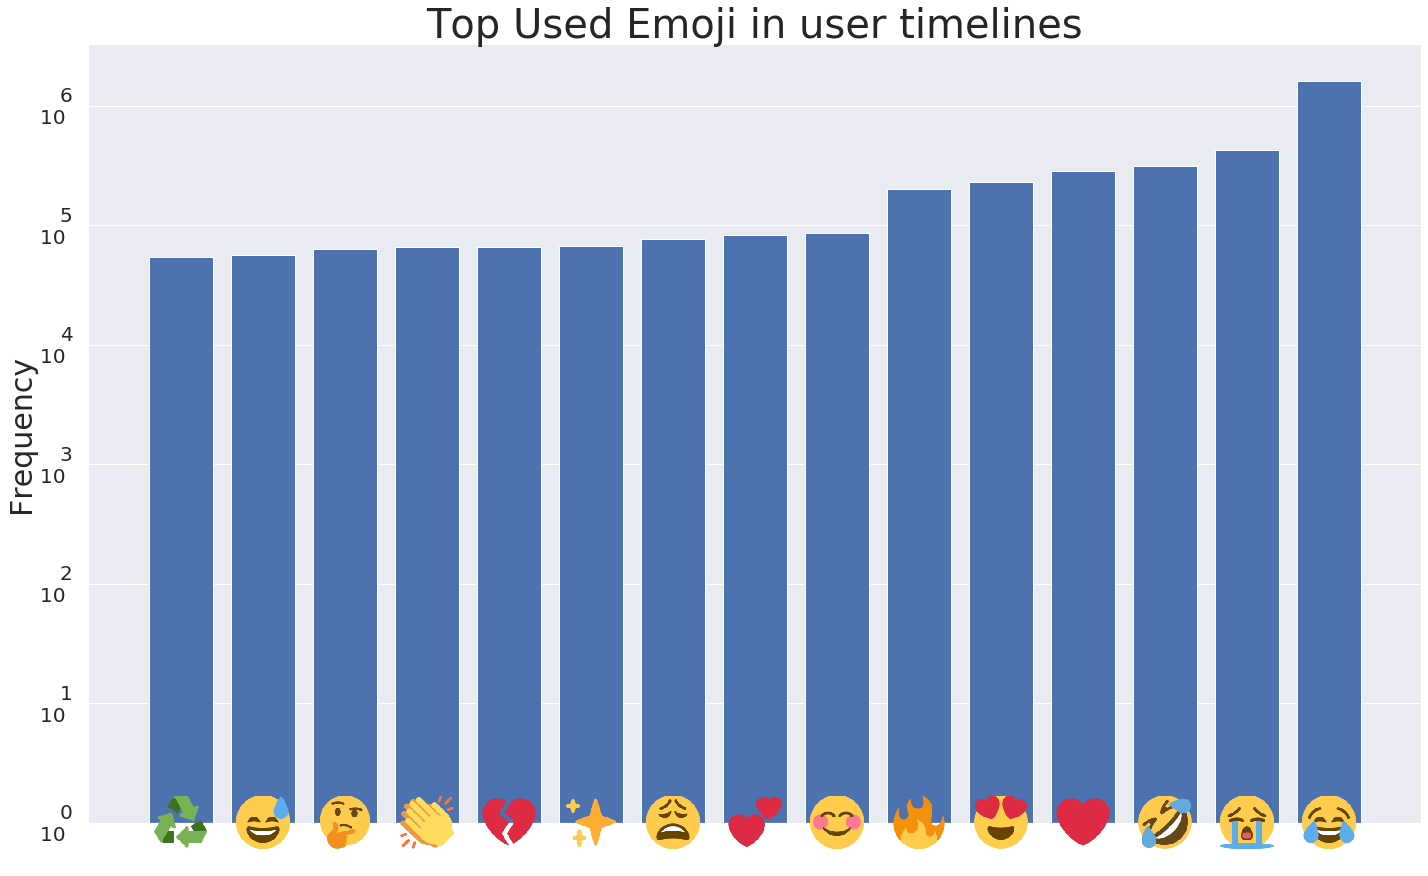

In [17]:
# Top 15 Values
x = emojis_count_df['Emoji'].tail(15).values
y = emojis_count_df['Count'].tail(15).values
y_log = np.log10(y.astype(int))

# Set linespacing
x_linespace = linspace(0, 4*pi, num=15)

# Plot Bar Chart
sns.set(color_codes=True) # Seaborn 
fig, ax = plt.subplots(figsize=(20,12))
ax.yaxis.set_major_formatter(formatter_pow10)
ax.tick_params(axis='both', which='major', pad=10)
#ax.set_facecolor('#dbd9d9')
plt.grid(linestyle='-', linewidth=1,axis='y')
plt.bar(x_linespace, y_log, width=0.7, bottom=None, align='center')#,color =colors_indianred_fade)
ax.get_xaxis().set_visible(False)
plt.yticks(fontsize =20)
plt.ylabel('Frequency', fontsize =30)
plt.title('Top Used Emoji in user timelines', fontsize =40)
plt.tight_layout()

# Plot emojis on x-axis
bar_chart_plot_emojis(ax,fig,x)
plt.show()

## Extract, Count & Sort Emojis for females

In [18]:
counts_df_female = counts_df.loc[counts_df['gender'] == "female"]

# Break before gender and race columns (2 gender and race , 1 for index)
break_val = counts_df_female.columns.size-3;

# Create panda dataframe to store emojis with counts
emojis_count_females_df = pd.DataFrame(columns = ['Emoji','Count'])

for enum,emoji in enumerate(counts_df_female.columns):
    if(enum == break_val):
        break
    emojis_count_females_df = emojis_count_females_df.append({'Emoji' : emoji , 'Count' : counts_df_female[emoji].sum()} , ignore_index=True)
    
# Sort dataframe by count
emojis_count_females_df = emojis_count_females_df.sort_values(by=['Count'])
emojis_count_females_df.tail(40)

,Emoji,Count
2266,😫,7884.0
2314,🎶,8070.0
2315,😉,8330.0
2284,🙈,9005.0
2305,🙌,9852.0
2263,😹,10261.0
2286,🙃,10482.0
2312,🎉,10573.0
2309,😔,10617.0
2225,💃,10711.0


## Extract, Count & Sort Emojis for males

In [19]:
counts_df_male = counts_df.loc[counts_df['gender'] == "male"]

# Break before gender and race columns (2 gender and race , 1 for index)
break_val = counts_df_male.columns.size-3;

# Create panda dataframe to store emojis with counts
emojis_count_males_df = pd.DataFrame(columns = ['Emoji','Count'])

for enum,emoji in enumerate(counts_df_male.columns):
    if(enum == break_val):
        break
    emojis_count_males_df = emojis_count_males_df.append({'Emoji' : emoji , 'Count' : counts_df_male[emoji].sum()} , ignore_index=True)
    
# Sort dataframe by count
emojis_count_males_df = emojis_count_males_df.sort_values(by=['Count'])
emojis_count_males_df.tail(40)

,Emoji,Count
2324,☺,5794.0
2312,🎉,5974.0
2304,😱,5982.0
2294,😏,6077.0
2303,😳,6116.0
2330,💙,6428.0
2284,🙈,6464.0
2340,✨,6733.0
2309,😔,6795.0
2279,😀,6825.0


## Dinstict Emojis per Gender

In [20]:
gender_stats_df = emojis_count_females_df.rename(columns={'Count': 'Females_Count'}).join(emojis_count_males_df.rename(columns={'Count': 'Males_Count'}).set_index('Emoji'), on='Emoji')

# Calculate percentage usage for each emoji per gender
female_count_perc = gender_stats_df['Females_Count'] /gender_stats_df['Females_Count'].sum()
gender_stats_df['Females_Count_Perc']=female_count_perc
male_count_perc = gender_stats_df['Males_Count'] /gender_stats_df['Males_Count'].sum()
gender_stats_df['Males_Count_Perc']=male_count_perc
male_perc_dif = gender_stats_df['Males_Count_Perc'] - gender_stats_df['Females_Count_Perc']
gender_stats_df['Males_Perc_Dif']=male_perc_dif
female_perc_dif = gender_stats_df['Females_Count_Perc'] - gender_stats_df['Males_Count_Perc']
gender_stats_df['Females_Perc_Dif']=female_perc_dif

gender_stats_df.tail(20)

,Emoji,Females_Count,Males_Count,Females_Count_Perc,Males_Count_Perc,Males_Perc_Dif,Females_Perc_Dif
2319,😅,14940.0,21901.0,0.005916,0.012586,0.006670,-0.006670
2327,💖,15148.0,4619.0,0.005998,0.002655,-0.003344,0.003344
2335,👏,16419.0,16011.0,0.006502,0.009201,0.002700,-0.002700
2337,🤔,16428.0,17293.0,0.006505,0.009938,0.003433,-0.003433
2320,😢,20308.0,11386.0,0.008042,0.006543,-0.001498,0.001498
2332,♥,21089.0,5481.0,0.008351,0.003150,-0.005201,0.005201
2340,✨,22070.0,6733.0,0.008739,0.003869,-0.004870,0.004870
2329,🙄,24195.0,10676.0,0.009581,0.006135,-0.003445,0.003445
2301,💀,24434.0,17901.0,0.009675,0.010288,0.000612,-0.000612
2334,😘,25045.0,8041.0,0.009917,0.004621,-0.005296,0.005296


## Top 15 Emojis Graph by Gender

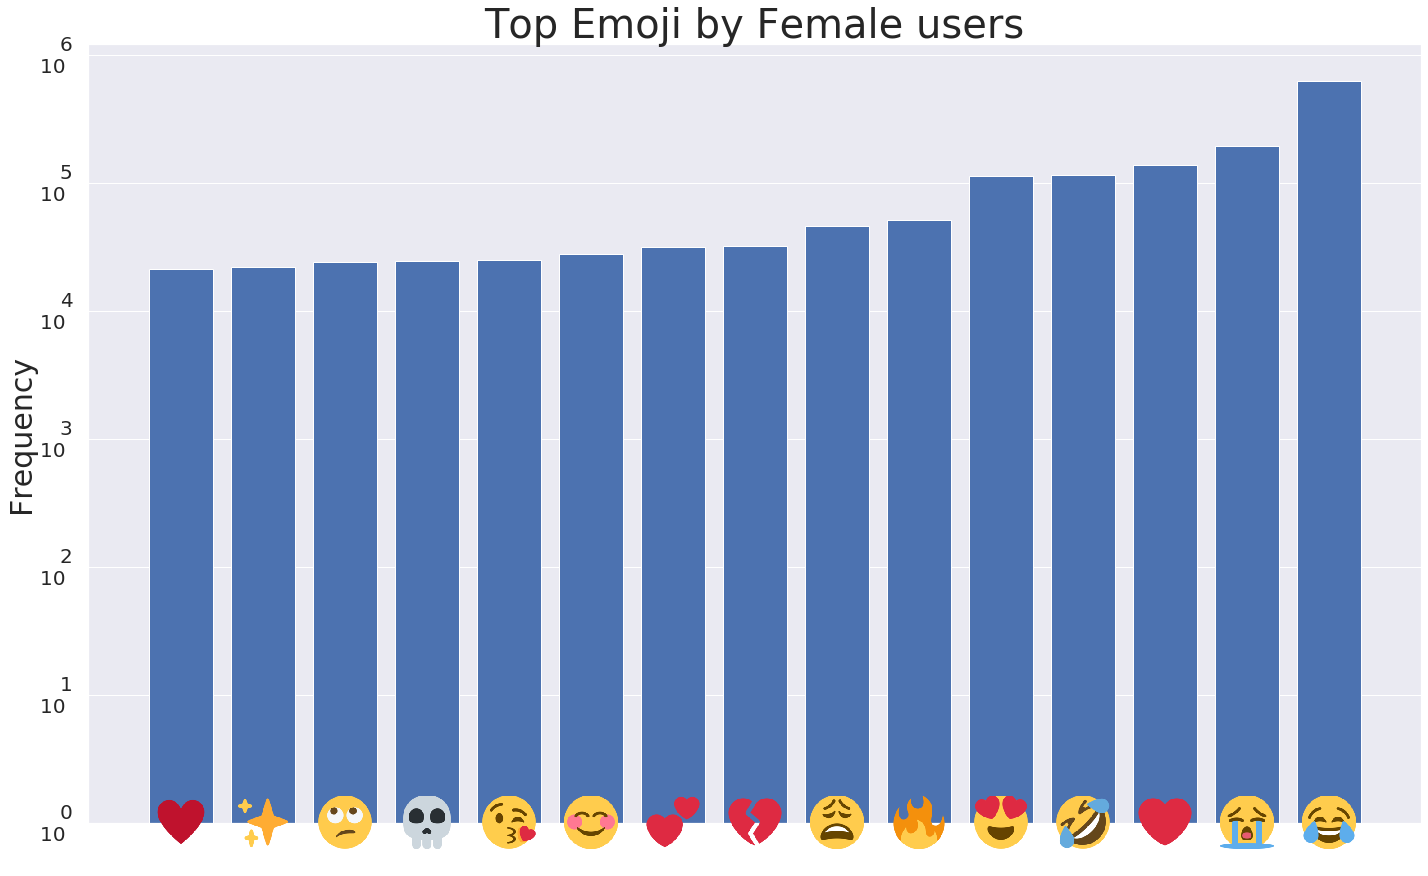

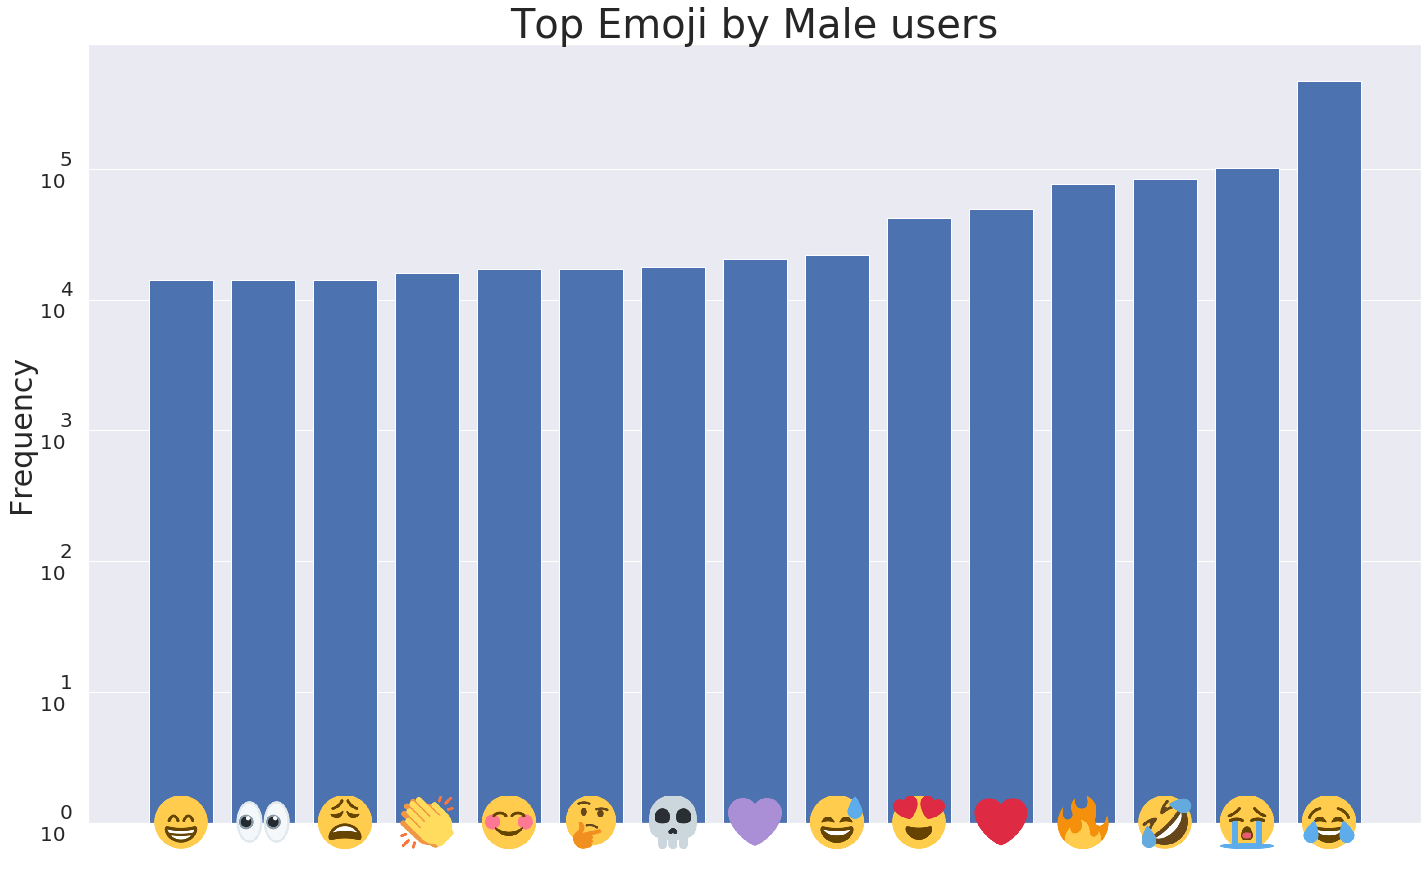

In [21]:
gender_list = ['Female','Male']
gender_values =[emojis_count_females_df,emojis_count_males_df]
#gender_graph_colours=['ffe9ec','6992C2']

for ind,gen in enumerate(gender_list):
    
    # Top 15 Values
    x = gender_values[ind]['Emoji'].tail(15).values
    y = gender_values[ind]['Count'].tail(15).values
    y_log = np.log10(y.astype(int))

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_pow10)
    ax.tick_params(axis='both', which='major', pad=10)
   # ax.set_facecolor('#{}'.format(gender_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y_log, width=0.7, bottom=None, align='center')#,color =colors_indianred_fade)
    ax.get_xaxis().set_visible(False)
    #plt.xticks(x, fontproperties=emojis_font)  Old method
    plt.yticks(fontsize =20)
    plt.ylabel('Frequency', fontsize =30)
    plt.title('Top Emoji by {} users'.format(gender_list[ind]), fontsize =40)
    plt.tight_layout()

    # Plot emojis on x-axis
    bar_chart_plot_emojis(ax,fig,x)
    plt.show()

## Top 15 Dinstinct Emojis by Gender

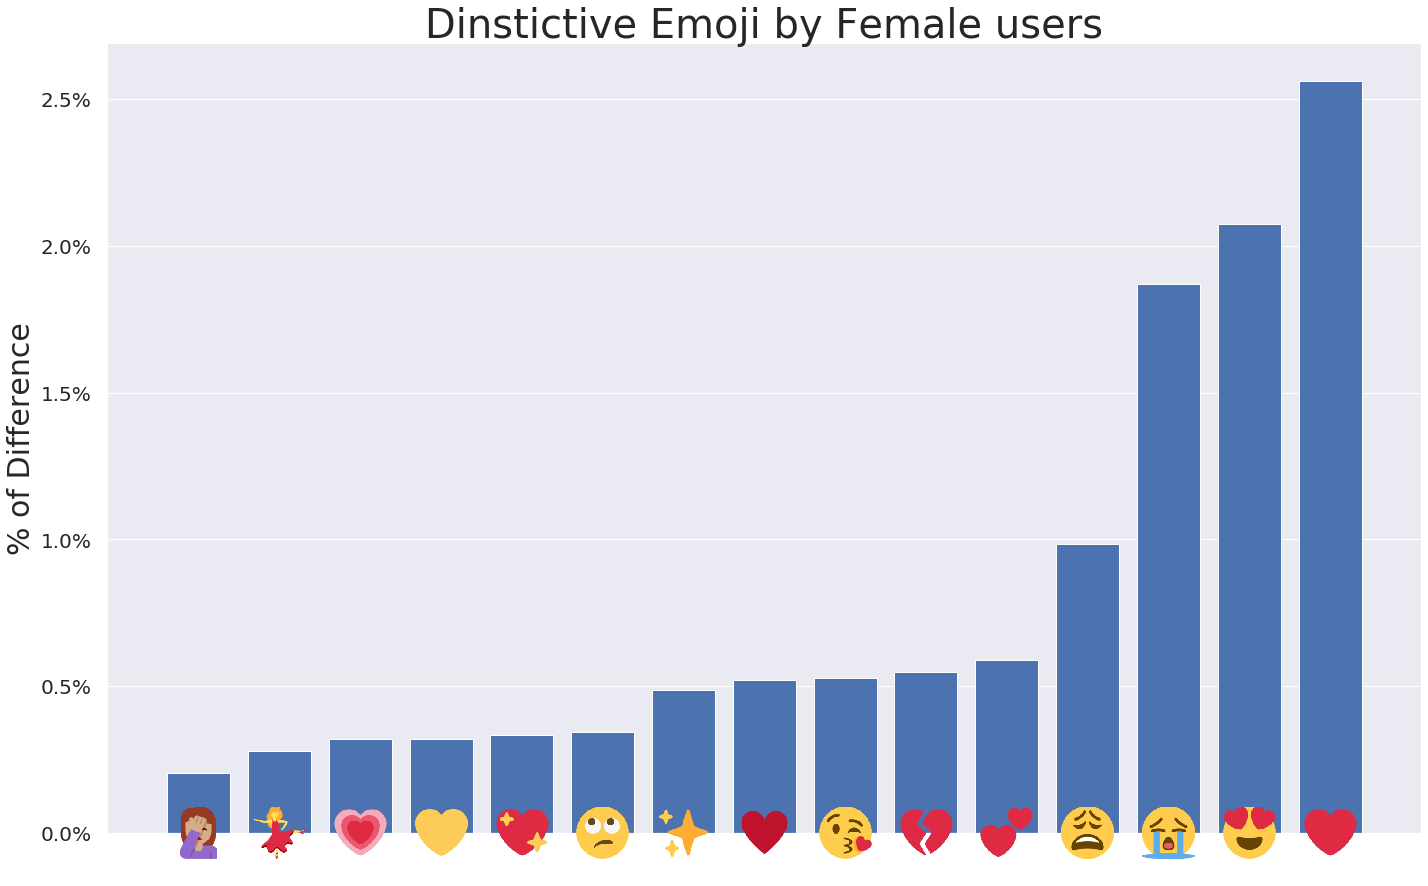

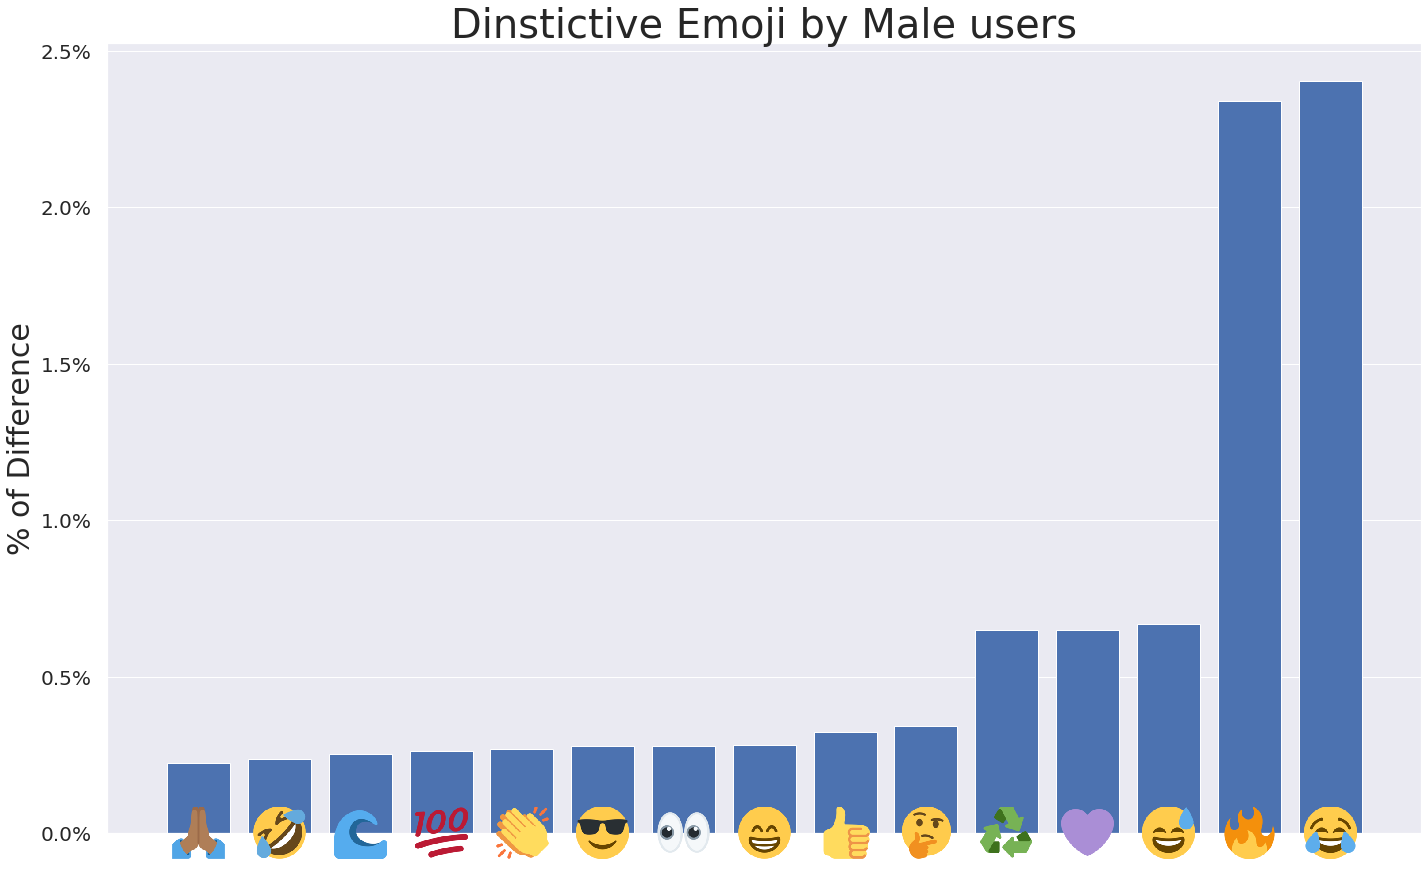

In [22]:
gender_list = ['Female','Male']
gender_values =[gender_stats_df.fillna(0).sort_values(by=['Females_Perc_Dif']),gender_stats_df.fillna(0).sort_values(by=['Males_Perc_Dif'])]
#gender_graph_colours=['ffe9ec','6992C2']

for ind,gen in enumerate(gender_list):
    
    # Top 15 Values
    x = gender_values[ind]['Emoji'].tail(15).values
    y = gender_values[ind]['{}s_Perc_Dif'.format(gender_list[ind])].tail(15).values
    
    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_percentage)
    ax.tick_params(axis='both', which='major', pad=10)
   # ax.set_facecolor('#{}'.format(gender_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y, width=0.7, bottom=None, align='center')#,color =colors_indianred_fade)
    ax.get_xaxis().set_visible(False)
    #plt.xticks(x, fontproperties=emojis_font)  Old method
    plt.yticks(fontsize =20)
    plt.ylabel('% of Difference', fontsize =30)
    plt.title('Dinstictive Emoji by {} users'.format(gender_list[ind]), fontsize =40)
    plt.tight_layout()

    # Plot emojis on x-axis
    bar_chart_plot_emojis(ax,fig,x)

    plt.show()

## Extract, Count & Sort Emojis for White Ethnicity

In [23]:
counts_white = counts_df.loc[counts_df['ethnicity'] == "white"]
count_not_white = counts_df.loc[counts_df['ethnicity'] != "white"]

# Create panda dataframe to store emojis with counts

# Whites
emojis_count_white_df = pd.DataFrame(columns = ['Emoji','Whites_Count'])

for enum,emoji in enumerate(counts_white.columns):
    if(enum == break_val):
        break
    emojis_count_white_df = emojis_count_white_df.append({'Emoji' : emoji , 'Whites_Count' : counts_white[emoji].sum()} , ignore_index=True)
    
# Not Whites
emojis_count_not_white_df = pd.DataFrame(columns = ['Emoji','Not_Whites_Count'])

for enum,emoji in enumerate(count_not_white.columns):
    if(enum == break_val):
        break
    emojis_count_not_white_df = emojis_count_not_white_df.append({'Emoji' : emoji , 'Not_Whites_Count' : count_not_white[emoji].sum()} , ignore_index=True)
    
# White Stats
white_stats_df = emojis_count_white_df.join(emojis_count_not_white_df.set_index('Emoji'), on='Emoji ')

# Calculate percentage usage for each emoji per ethnicity
white_count_perc = white_stats_df['Whites_Count'] /white_stats_df['Whites_Count'].sum()
white_stats_df['Whites_Count_Perc']=white_count_perc
not_white_count_perc = white_stats_df['Not_Whites_Count'] /white_stats_df['Not_Whites_Count'].sum()
white_stats_df['Not_Whites_Count_Perc']=not_white_count_perc
white_perc_dif = white_stats_df['Whites_Count_Perc'] - white_stats_df['Not_Whites_Count_Perc']
white_stats_df['Whites_Perc_Dif']=white_perc_dif
not_white_perc_dif = white_stats_df['Not_Whites_Count_Perc'] - white_stats_df['Whites_Count_Perc']
white_stats_df['Not_Whites_Perc_Dif']=not_white_perc_dif

white_stats_df = white_stats_df.fillna(0).sort_values(by=['Whites_Perc_Dif'])
white_stats_df.tail(20)

,Emoji,Whites_Count,Not_Whites_Count,Whites_Count_Perc,Not_Whites_Count_Perc,Whites_Perc_Dif,Not_Whites_Perc_Dif
2316,💚,5410.0,18510.0,0.005408,0.003067,0.002341,-0.002341
2251,🔴,3264.0,5096.0,0.003263,0.000844,0.002419,-0.002419
2120,🙌🏼,3088.0,3531.0,0.003087,0.000585,0.002502,-0.002502
2312,🎉,6317.0,22786.0,0.006315,0.003775,0.002540,-0.002540
2187,🙌🏻,3455.0,3434.0,0.003454,0.000569,0.002885,-0.002885
2207,🔵,3328.0,2098.0,0.003327,0.000348,0.002979,-0.002979
2333,👍,8032.0,29861.0,0.008029,0.004947,0.003082,-0.003082
2329,🙄,10169.0,42015.0,0.010165,0.006961,0.003204,-0.003204
2270,🖤,4953.0,9824.0,0.004951,0.001628,0.003324,-0.003324
2197,👏🏼,4279.0,5229.0,0.004277,0.000866,0.003411,-0.003411


## Extract, Count & Sort Emojis for Black Ethnicity

In [24]:
count_black = counts_df.loc[counts_df['ethnicity'] == "black"]
count_not_black = counts_df.loc[counts_df['ethnicity'] != "black"]

# Create panda dataframe to store emojis with counts

# Black
emojis_count_black_df = pd.DataFrame(columns = ['Emoji','Blacks_Count'])

for enum,emoji in enumerate(count_black.columns):
    if(enum == break_val):
        break
    emojis_count_black_df = emojis_count_black_df.append({'Emoji' : emoji , 'Blacks_Count' : count_black[emoji].sum()} , ignore_index=True)
    
# Not Black
emojis_count_not_black_df = pd.DataFrame(columns = ['Emoji','Not_Blacks_Count'])

for enum,emoji in enumerate(count_not_black.columns):
    if(enum == break_val):
        break
    emojis_count_not_black_df = emojis_count_not_black_df.append({'Emoji' : emoji , 'Not_Blacks_Count' : count_not_black[emoji].sum()} , ignore_index=True)
    
# Black Stats
black_stats_df = emojis_count_black_df.join(emojis_count_not_black_df.set_index('Emoji'), on='Emoji')

# Calculate percentage usage for each emoji per ethnicity
black_count_perc = black_stats_df['Blacks_Count'] /black_stats_df['Blacks_Count'].sum()
black_stats_df['Blacks_Count_Perc']=black_count_perc
not_black_count_perc = black_stats_df['Not_Blacks_Count'] /black_stats_df['Not_Blacks_Count'].sum()
black_stats_df['Not_Blacks_Count_Perc']=not_black_count_perc
black_perc_dif = black_stats_df['Blacks_Count_Perc'] - black_stats_df['Not_Blacks_Count_Perc']
black_stats_df['Blacks_Perc_Dif']=black_perc_dif
not_black_perc_dif = black_stats_df['Not_Blacks_Count_Perc'] - black_stats_df['Blacks_Count_Perc']
black_stats_df['Not_Blacks_Perc_Dif']=not_black_perc_dif

black_stats_df = black_stats_df.fillna(0).sort_values(by=['Blacks_Perc_Dif'])
black_stats_df.tail(20)

,Emoji,Blacks_Count,Not_Blacks_Count,Blacks_Count_Perc,Not_Blacks_Count_Perc,Blacks_Perc_Dif,Not_Blacks_Perc_Dif
1957,💃🏽,4047.0,1987.0,0.001627,0.000437,0.001190,-0.001190
2247,🗣,7146.0,7329.0,0.002873,0.001611,0.001261,-0.001261
2129,🙏🏽,5762.0,4697.0,0.002316,0.001033,0.001284,-0.001284
2122,🤦🏾‍♀️,3939.0,719.0,0.001583,0.000158,0.001425,-0.001425
2058,🤷🏾‍♀️,3878.0,551.0,0.001559,0.000121,0.001438,-0.001438
2320,😢,20504.0,30605.0,0.008243,0.006729,0.001514,-0.001514
2287,💯,12781.0,15366.0,0.005138,0.003378,0.001760,-0.001760
2225,💃,10237.0,8890.0,0.004115,0.001954,0.002161,-0.002161
2073,👏🏾,8388.0,4085.0,0.003372,0.000898,0.002474,-0.002474
2263,😹,14009.0,10100.0,0.005632,0.002220,0.003411,-0.003411


## Extract, Count & Sort Emojis for Hispanic Ethnicity

In [25]:
count_other = counts_df.loc[counts_df['ethnicity'] == "hispanic"]# or "other")]
count_not_other = counts_df.loc[counts_df['ethnicity'] != "hispanic"]# or "other")]

# Create panda dataframe to store emojis with counts

# Others 
emojis_count_other_df = pd.DataFrame(columns = ['Emoji','Others_Count'])

for enum,emoji in enumerate(count_other.columns):
    if(enum == break_val):
        break
    emojis_count_other_df = emojis_count_other_df.append({'Emoji' : emoji , 'Others_Count' : count_other[emoji].sum()} , ignore_index=True)
    
# Not Others
emojis_count_not_other_df = pd.DataFrame(columns = ['Emoji','Not_Others_Count'])

for enum,emoji in enumerate(count_not_other.columns):
    if(enum == break_val):
        break
    emojis_count_not_other_df = emojis_count_not_other_df.append({'Emoji' : emoji , 'Not_Others_Count' : count_not_other[emoji].sum()} , ignore_index=True)
    
# Others Stats
other_stats_df = emojis_count_other_df.join(emojis_count_not_other_df.set_index('Emoji'), on='Emoji')

# Calculate percentage usage for each emoji per ethnicity
other_count_perc = other_stats_df['Others_Count'] /other_stats_df['Others_Count'].sum()
other_stats_df['Others_Count_Perc']=other_count_perc
not_other_count_perc = other_stats_df['Not_Others_Count'] /other_stats_df['Not_Others_Count'].sum()
other_stats_df['Not_Others_Count_Perc']=not_other_count_perc
other_perc_dif = other_stats_df['Others_Count_Perc'] - other_stats_df['Not_Others_Count_Perc']
other_stats_df['Others_Perc_Dif']=other_perc_dif
not_other_perc_dif = other_stats_df['Not_Others_Count_Perc'] - other_stats_df['Others_Count_Perc']
other_stats_df['Not_Others_Perc_Dif']=not_black_perc_dif

other_stats_df = other_stats_df.fillna(0).sort_values(by=['Others_Perc_Dif'])
other_stats_df.tail(20)

,Emoji,Others_Count,Not_Others_Count,Others_Count_Perc,Not_Others_Count_Perc,Others_Perc_Dif,Not_Others_Perc_Dif
2152,🙏🏼,232.0,5633.0,0.002797,0.000810,0.001987,0.000777
2111,🙌🏽,287.0,9631.0,0.003460,0.001385,0.002075,-0.000919
2277,🤪,321.0,12032.0,0.003870,0.001730,0.002140,0.001199
2269,☹,335.0,12039.0,0.004039,0.001731,0.002308,0.000042
2330,💙,619.0,35082.0,0.007463,0.005045,0.002418,0.005497
2158,🤦,235.0,2233.0,0.002833,0.000321,0.002512,0.000193
2294,😏,462.0,20498.0,0.005570,0.002948,0.002622,-0.000124
2260,🤧,357.0,10806.0,0.004304,0.001554,0.002750,-0.000161
2261,😪,405.0,14188.0,0.004883,0.002041,0.002843,-0.000680
2295,😒,530.0,23937.0,0.006390,0.003443,0.002948,-0.001076


## Extract, Count & Sort Emojis for Asian Ethnicity

In [26]:
count_asian = counts_df.loc[counts_df['ethnicity'] == "asian"]# or "other")]
count_not_asian = counts_df.loc[counts_df['ethnicity'] != "asian"]# or "other")]

# Create panda dataframe to store emojis with counts

# Asians 
emojis_count_asian_df = pd.DataFrame(columns = ['Emoji','Asians_Count'])

for enum,emoji in enumerate(count_asian.columns):
    if(enum == break_val):
        break
    emojis_count_asian_df = emojis_count_asian_df.append({'Emoji' : emoji , 'Asians_Count' : count_asian[emoji].sum()} , ignore_index=True)
    
# Not Asians
emojis_count_not_asian_df = pd.DataFrame(columns = ['Emoji','Not_Asians_Count'])

for enum,emoji in enumerate(count_not_asian.columns):
    if(enum == break_val):
        break
    emojis_count_not_asian_df = emojis_count_not_asian_df.append({'Emoji' : emoji , 'Not_Asians_Count' : count_not_asian[emoji].sum()} , ignore_index=True)
    
# Asians Stats
asian_stats_df = emojis_count_asian_df.join(emojis_count_not_asian_df.set_index('Emoji'), on='Emoji')

# Calculate percentage usage for each emoji per gender
asian_count_perc = asian_stats_df['Asians_Count'] /asian_stats_df['Asians_Count'].sum()
asian_stats_df['Asians_Count_Perc']=asian_count_perc
not_asian_count_perc = asian_stats_df['Not_Asians_Count'] /asian_stats_df['Not_Asians_Count'].sum()
asian_stats_df['Not_Asians_Count_Perc']=not_asian_count_perc
asian_perc_dif = asian_stats_df['Asians_Count_Perc'] - asian_stats_df['Not_Asians_Count_Perc']
asian_stats_df['Asians_Perc_Dif']=asian_perc_dif
not_asian_perc_dif = asian_stats_df['Not_Asians_Count_Perc'] - asian_stats_df['Asians_Count_Perc']
asian_stats_df['Not_Asians_Perc_Dif']=not_black_perc_dif

asian_stats_df = asian_stats_df.fillna(0).sort_values(by=['Asians_Perc_Dif'])
asian_stats_df.tail(20)

,Emoji,Asians_Count,Not_Asians_Count,Asians_Count_Perc,Not_Asians_Count_Perc,Asians_Perc_Dif,Not_Asians_Perc_Dif
2103,❓,950.0,642.0,0.003476,0.000095,0.003382,0.000305
2321,😁,2778.0,43795.0,0.010166,0.006476,0.003690,0.001146
2288,🎵,1381.0,8764.0,0.005054,0.001296,0.003758,0.001262
2310,‼,1698.0,15939.0,0.006214,0.002357,0.003857,0.001544
2322,💛,2778.0,29266.0,0.010166,0.004327,0.005839,0.003518
2316,💚,2501.0,21419.0,0.009152,0.003167,0.005985,0.004160
2090,⏩,1768.0,484.0,0.006470,0.000072,0.006398,0.000488
2290,❗,2141.0,9115.0,0.007835,0.001348,0.006487,0.001430
2326,💦,2546.0,19102.0,0.009317,0.002825,0.006492,0.003474
2327,💖,3372.0,31954.0,0.012340,0.004725,0.007615,0.004706


## Top 15 Emojis Graph by Ethnicity

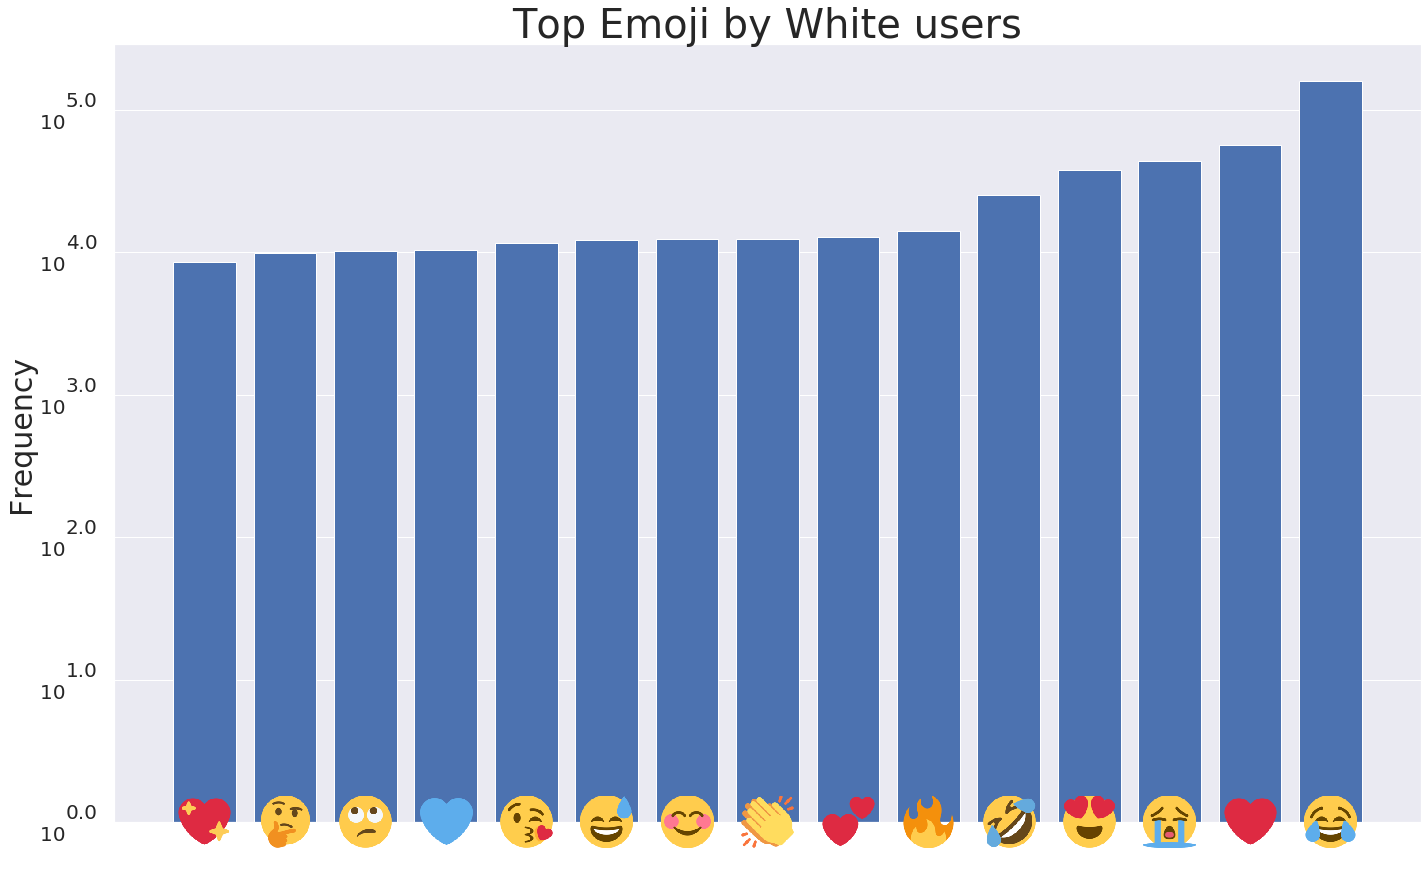

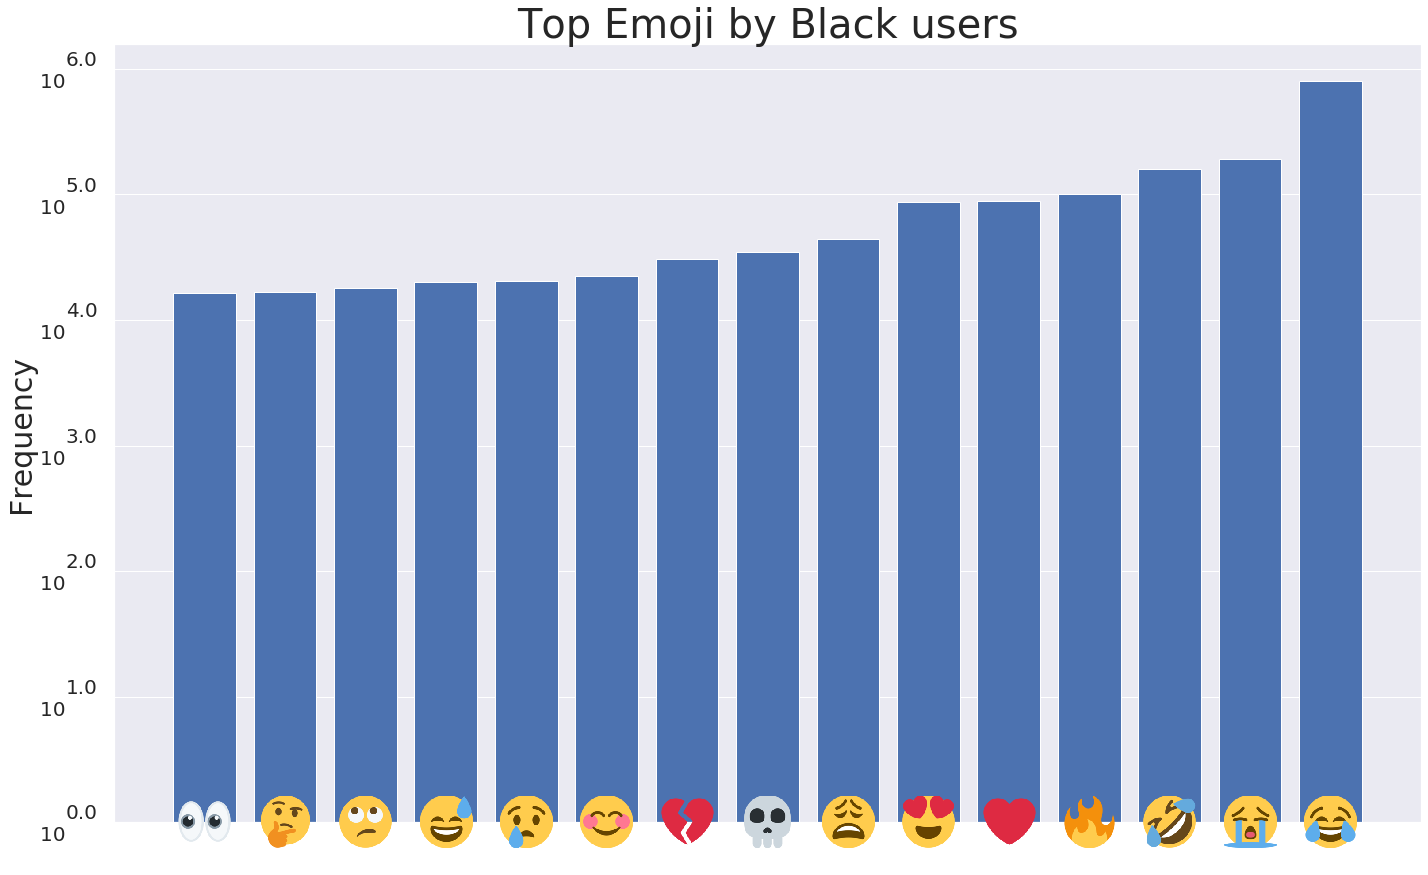

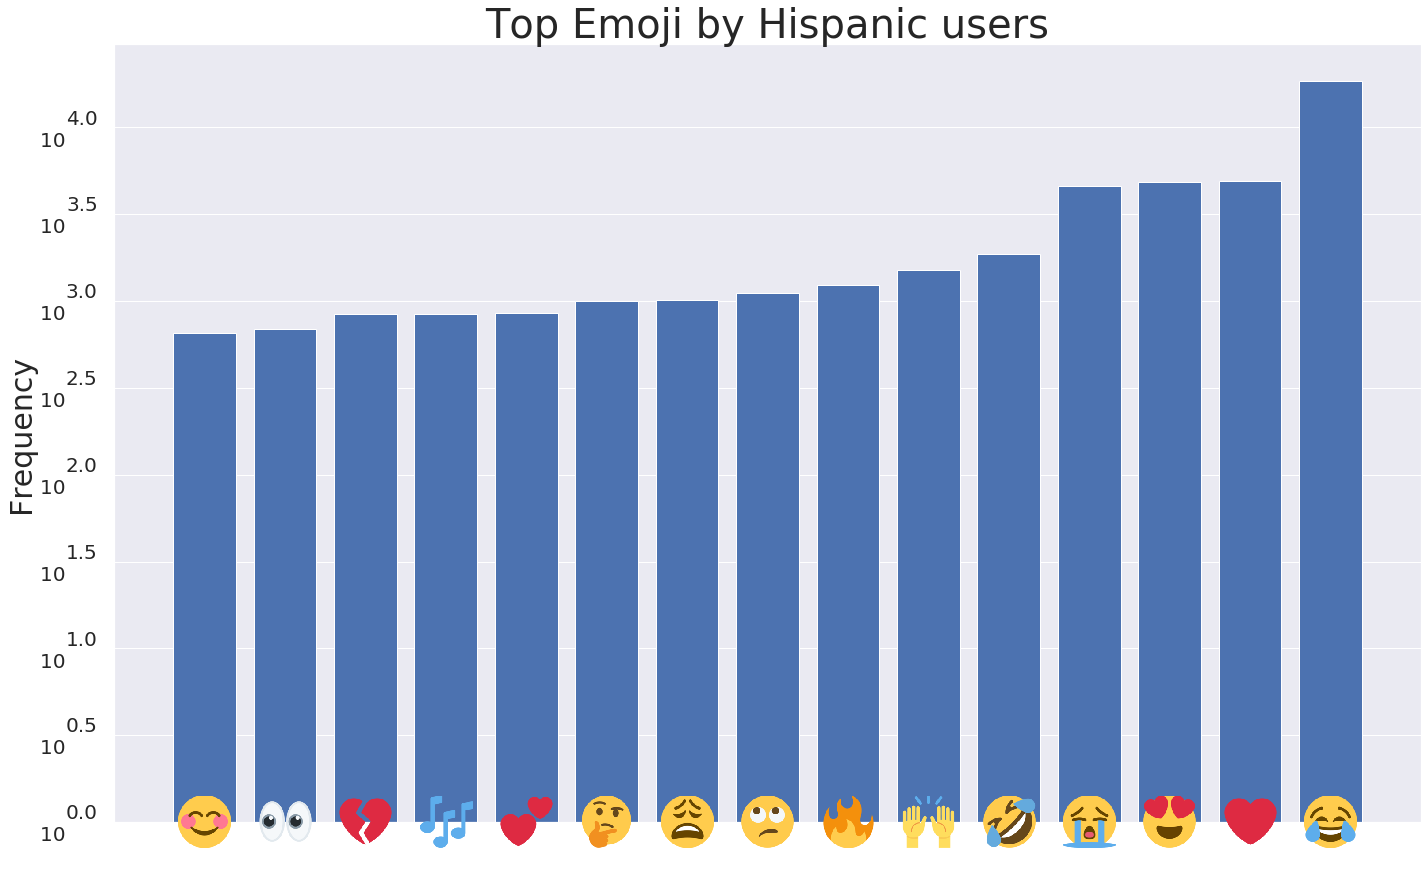

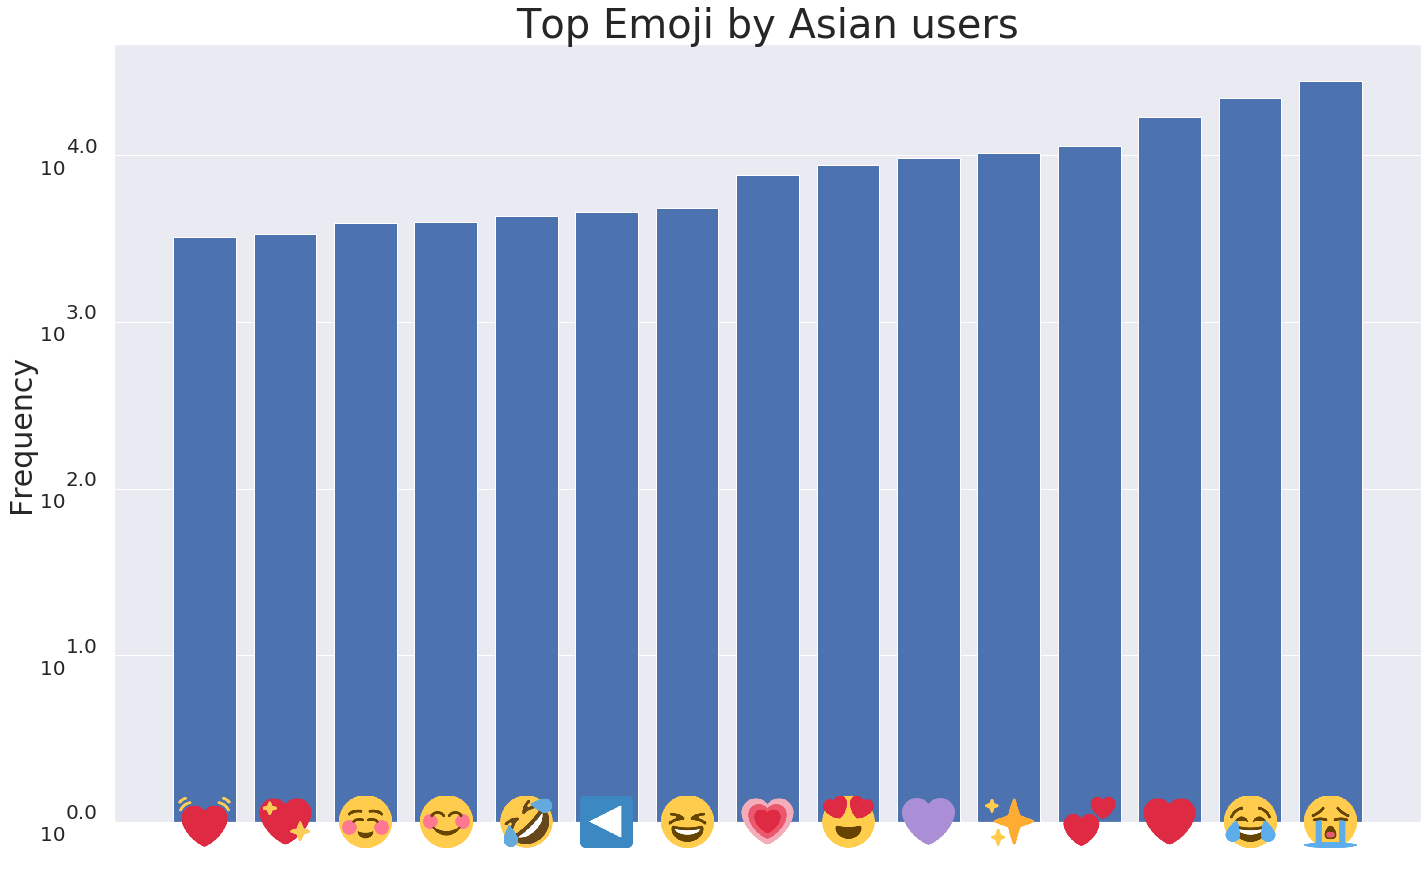

In [27]:
ethnicities_list = ['White','Black','Other','Asian']
ethnicities_values =[white_stats_df.sort_values(by=['Whites_Count']),black_stats_df.sort_values(by=['Blacks_Count']),other_stats_df.sort_values(by=['Others_Count']),asian_stats_df.sort_values(by=['Asians_Count'])]
#ethnicities_graph_colours=['dbd9d9','a3a3a3','e1b68b','ffeeb7']

for ind,ethn in enumerate(ethnicities_list):

     # Top 15 Values
    x = ethnicities_values[ind]['Emoji'].tail(15).values
    y = ethnicities_values[ind]['{}s_Count'.format(ethnicities_list[ind])].tail(15).values
    y_log = np.log10(y.astype(int))

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_pow10_1dp)
    ax.tick_params(axis='both', which='major', pad=10)
    #ax.set_facecolor('#{}'.format(ethnicities_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y_log, width=0.7, bottom=None, align='center')#,color =colors_indianred_fade)
    ax.get_xaxis().set_visible(False)
    plt.yticks(fontsize =20)
    plt.ylabel('Frequency', fontsize =30)
    plt.title('Top Emoji by {} users'.format(ethnicities_list[ind]), fontsize =40)
    if(ethnicities_list[ind] == 'Other'):
        plt.title('Top Emoji by Hispanic users', fontsize =40)
    plt.tight_layout()

    # Plot emojis on x-axis
    bar_chart_plot_emojis(ax,fig,x)
    plt.show()

## Top 15 Dinstict Emojis Graph by Ethnicity

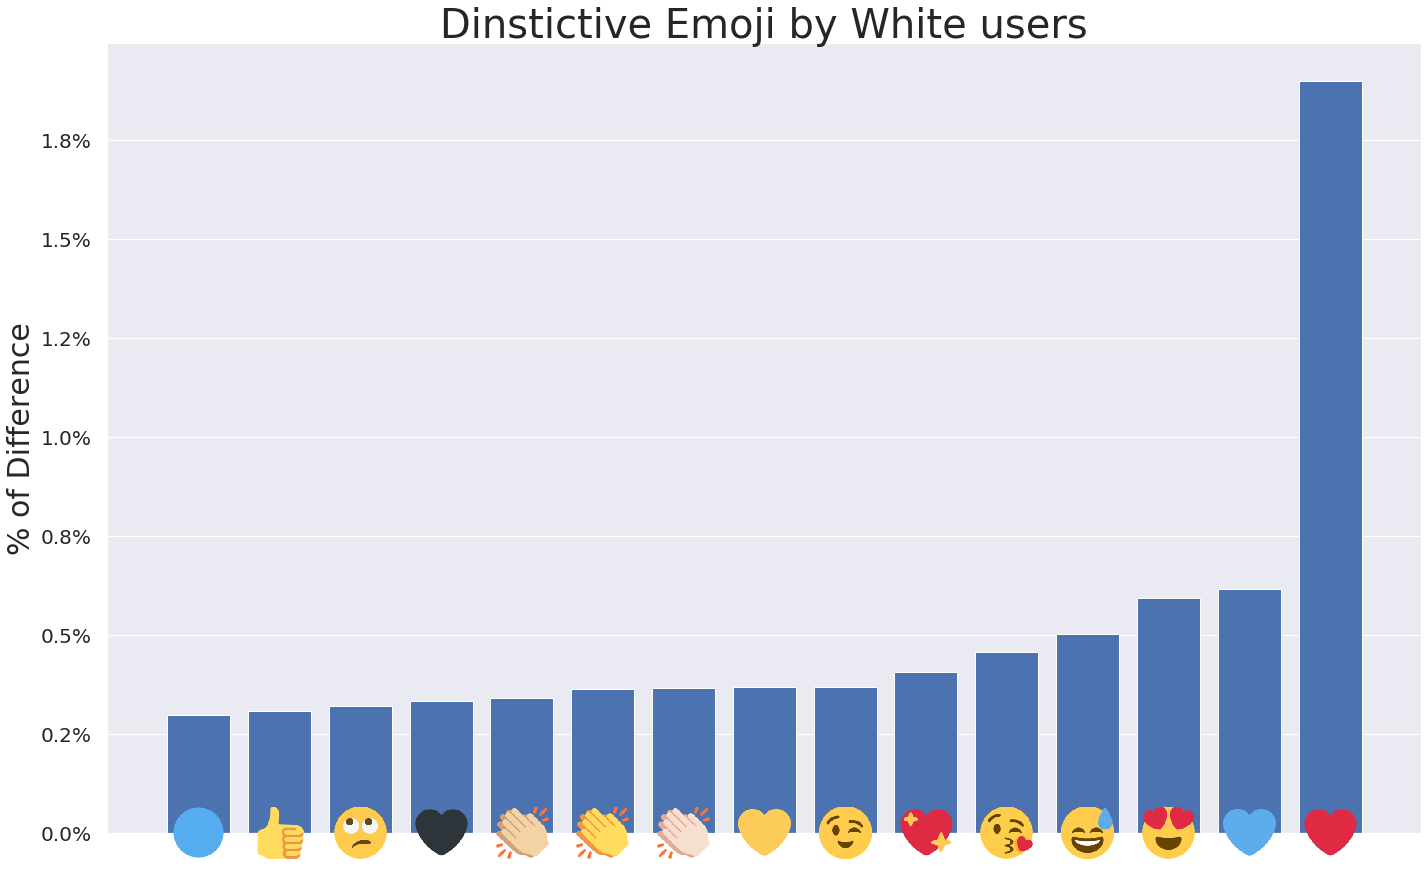

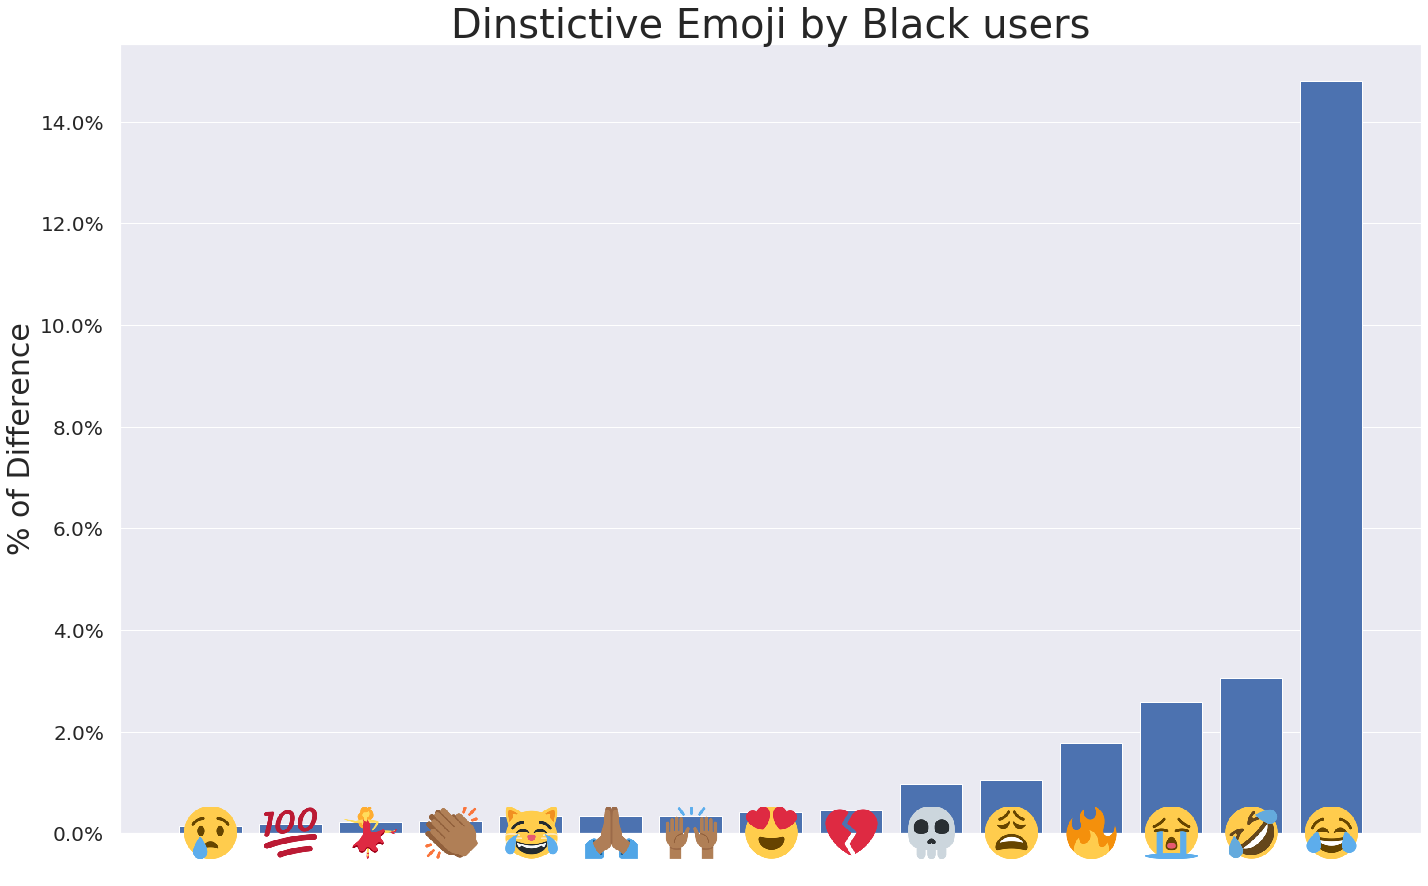

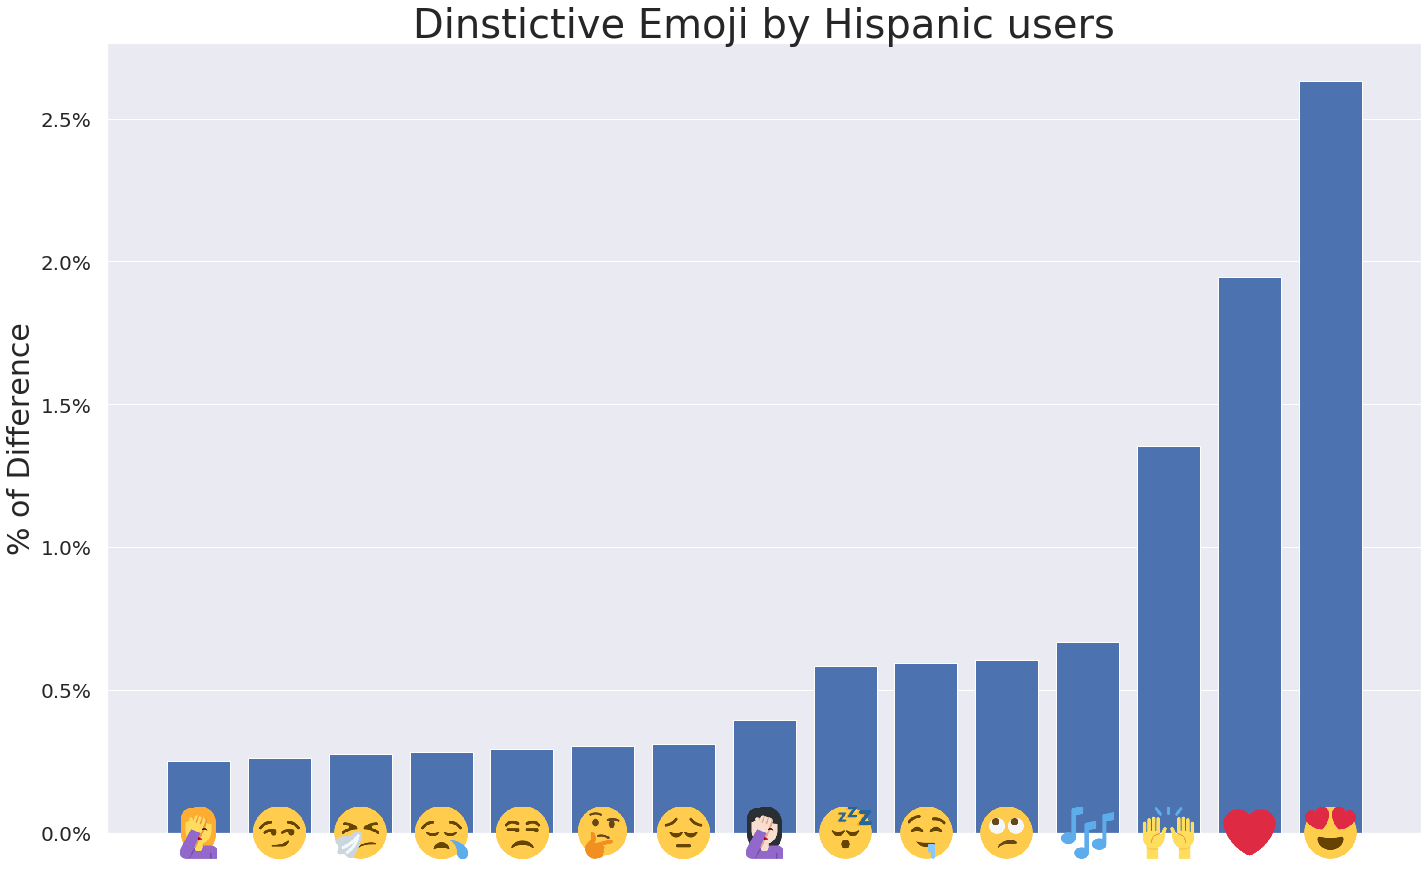

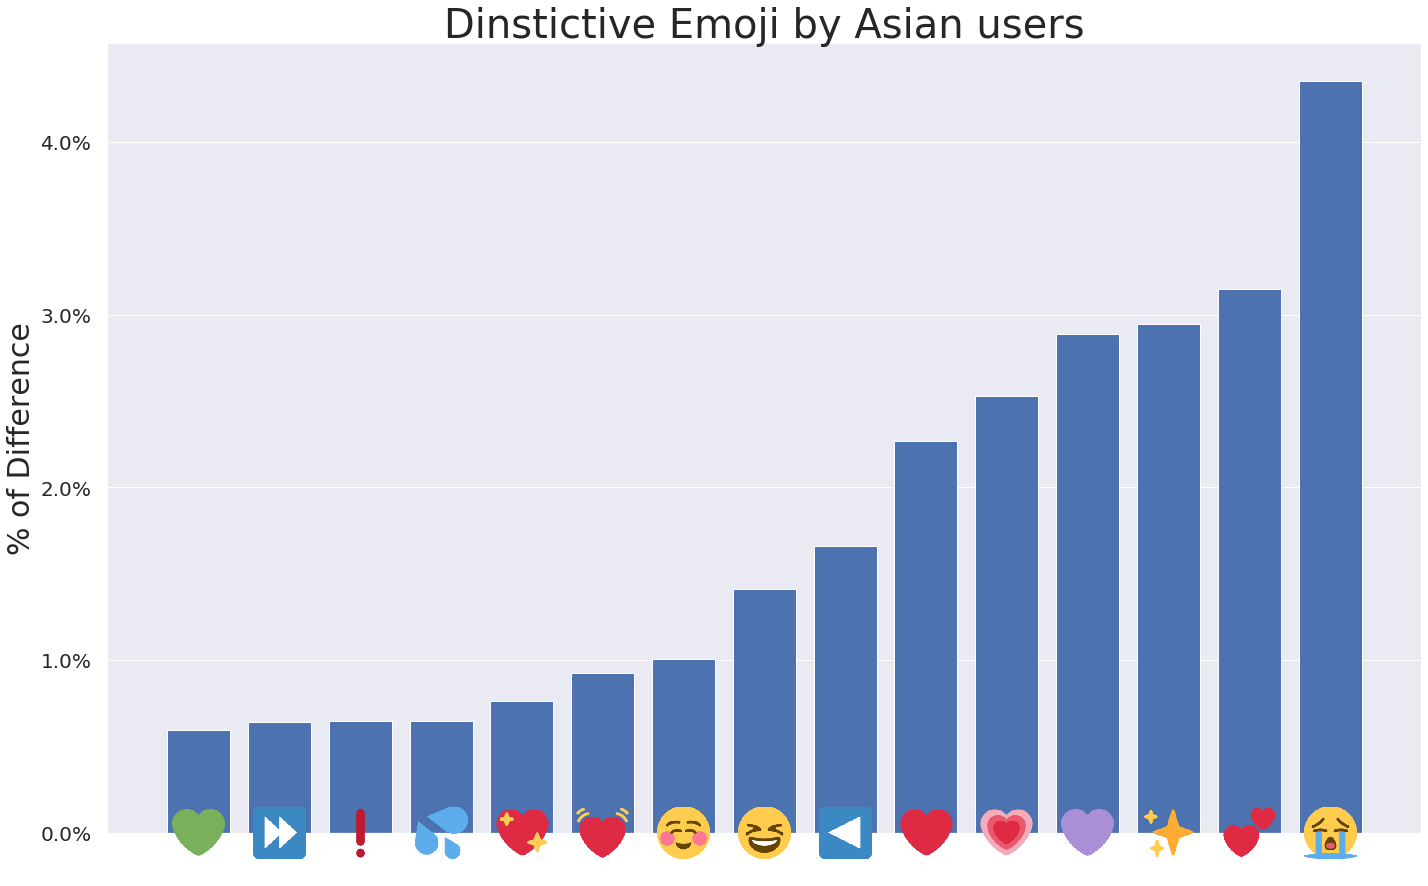

In [28]:
ethnicities_list = ['White','Black','Other','Asian']
ethnicities_values =[white_stats_df.sort_values(by=['Whites_Perc_Dif']),black_stats_df.sort_values(by=['Blacks_Perc_Dif']),other_stats_df.sort_values(by=['Others_Perc_Dif']),asian_stats_df.sort_values(by=['Asians_Perc_Dif'])]
#ethnicities_graph_colours=['dbd9d9','a3a3a3','e1b68b','ffeeb7']

for ind,ethn in enumerate(ethnicities_list):

     # Top 15 Values
    x = ethnicities_values[ind]['Emoji'].tail(15).values
    y = ethnicities_values[ind]['{}s_Perc_Dif'.format(ethnicities_list[ind])].tail(15).values

    # Set linespacing
    x_linespace = linspace(0, 4*pi, num=15)

    # Plot Bar Chart
    fig, ax = plt.subplots(figsize=(20,12))
    ax.yaxis.set_major_formatter(formatter_percentage)
    ax.tick_params(axis='both', which='major', pad=10)
    #ax.set_facecolor('#{}'.format(ethnicities_graph_colours[ind]))
    plt.grid(linestyle='-', linewidth=1,axis='y')
    plt.bar(x_linespace, y, width=0.7, bottom=None, align='center')#,color =colors_indianred_fade)
    ax.get_xaxis().set_visible(False)
    plt.yticks(fontsize =20)
    plt.ylabel('% of Difference', fontsize =30)
    plt.title('Dinstictive Emoji by {} users'.format(ethnicities_list[ind]), fontsize =40)
    if(ethnicities_list[ind] == 'Other'):
        plt.title('Dinstictive Emoji by Hispanic users', fontsize =40)
    plt.tight_layout()

    # Plot emojis on x-axis
    bar_chart_plot_emojis(ax,fig,x)
    plt.show()

## Top 15 Emojis Worldwide Pie Chart

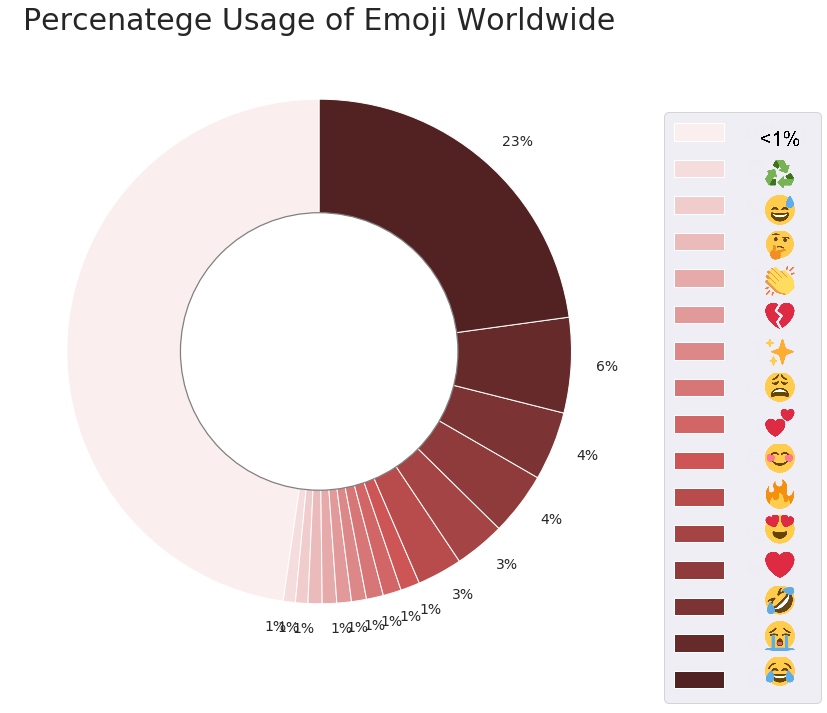

In [30]:
x = emojis_count_df['Emoji'].tail(15).values
y = (emojis_count_df['Count']/emojis_count_df['Count'].sum()).tail(15).values
fill = 1 -y.sum()
new_y = np.append([fill],y)

y_labels = []
for i,perc in enumerate (y):
    y_labels.append("{:.0f}%".format(perc*100))
# Don't show other <1%
y_labels.insert(0,"")

# Plot pie chart
fig, ax = plt.subplots(figsize=(17,12))
title = plt.title('Percenatege Usage of Emoji Worldwide', fontsize =30)
title.set_ha("center")
plt.gca().axis("equal")
pie = plt.pie(new_y,labels=y_labels,colors=colors_indianred_fade, startangle=90, textprops={'fontsize': 14})
legend = plt.legend(pie[0],np.append(['other'],x), bbox_to_anchor=(0.67,0.45), loc="center right", fontsize=25, 
           bbox_transform=plt.gcf().transFigure)
plt.setp(legend.get_texts(), color='#ededf3')
plt.subplots_adjust(left=0.0, bottom=0.15, right=0.5)

# Add cicrle in the center
centre_circle = plt.Circle((0,0),0.55,color='grey', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Plot emojis on legend
pie_chart_plot_emojis(ax,fig,x)
plt.show()